In [8]:
import Crypto_PM as PM
import pandas_datareader as web
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import seaborn as sns


In [9]:
start = datetime(2020,1,1)
end = datetime.today()

<AxesSubplot:xlabel='Date'>

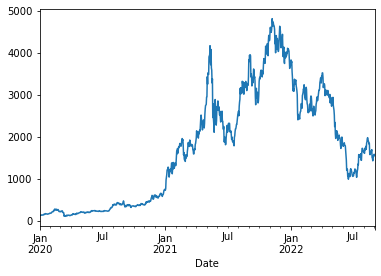

In [10]:
eth_prices = web.DataReader('ETH-USD', 'yahoo', start, end)
eth_prices['Close'].plot()

<AxesSubplot:xlabel='Date'>

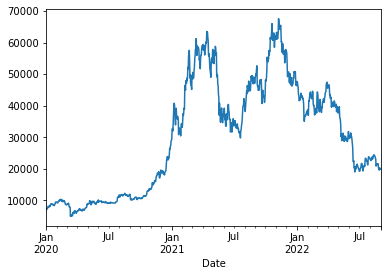

In [11]:
btc_prices = web.DataReader('BTC-USD', 'yahoo', start, end)
btc_prices['Close'].plot()

<AxesSubplot:xlabel='Date'>

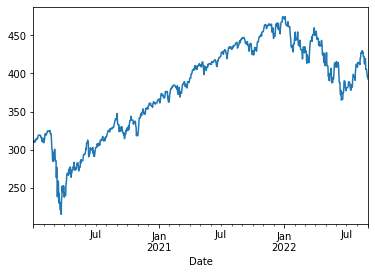

In [12]:
spy_prices = web.DataReader('SPY', 'yahoo', start, end)
spy_prices = spy_prices.resample('D').ffill() #resample to get all days instead of just trading days
spy_prices['Adj Close'].plot()

In [13]:
stable_lp = PM.lp_stable_value(pd.Series(eth_prices['Close']), 1000, 0.25)['lp_value_yield'] #create an LP position of ETH/USD

In [14]:
eth_btc_lp = PM.lp_tokens_value(pd.Series(eth_prices['Close']), pd.Series(btc_prices['Close']), 1000, 0.25)

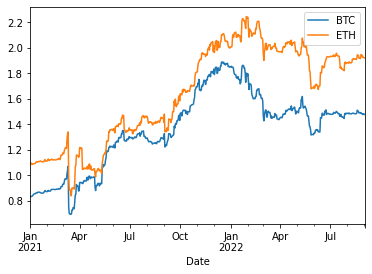

In [15]:
#rolling 12mo beta for BTC and ETH to SPY
beta_btc = btc_prices['Close'].pct_change().rolling(365).cov(spy_prices['Adj Close'].pct_change())/spy_prices['Adj Close'].pct_change().rolling(365).var()
beta_eth = eth_prices['Close'].pct_change().rolling(365).cov(spy_prices['Adj Close'].pct_change())/spy_prices['Adj Close'].pct_change().rolling(365).var()

beta_btc.dropna().plot(label='BTC')
beta_eth.dropna().plot(label='ETH')
plt.legend()

Text(0, 0.5, '$ Price')

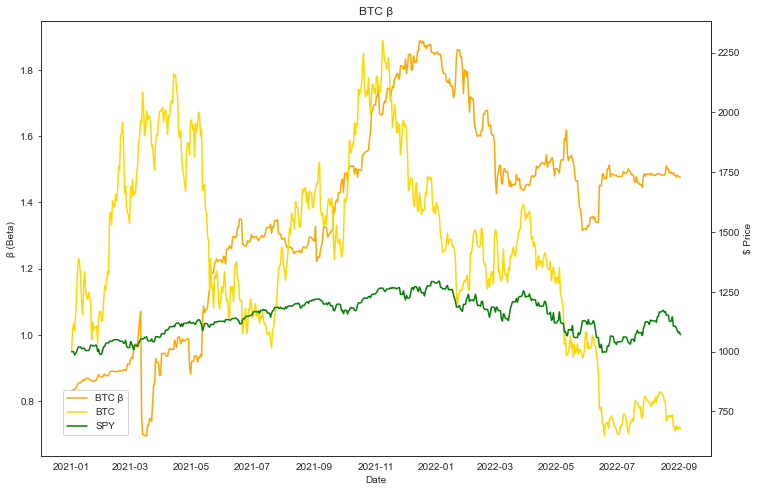

In [16]:
sns.set_style('white')
plt.rcParams["figure.figsize"] = [12, 8]
fig, ax1 = plt.subplots()
ax1.plot(beta_btc.loc["2021-01-01"::], color='Orange', label='Bitcoin β')
ax2 = ax1.twinx()
ax2.plot(btc_prices['Close'].loc["2021-01-01"::]/btc_prices['Close'].loc["2021-01-01"::].iloc[0]*1000, color='Gold', label='BTC')
ax3 = plt.plot(spy_prices['Adj Close'].loc["2021-01-01"::]/spy_prices['Adj Close'].loc["2021-01-01"::].iloc[0]*1000, color='Green', label='SPY')
fig.legend(['BTC β', 'BTC', 'SPY'], loc='center left', bbox_to_anchor=(0.145, 0.2))
plt.title("BTC β")
ax1.set_xlabel('Date')
ax1.set_ylabel('β (Beta)')
ax2.set_ylabel('$ Price')

Text(0, 0.5, '$ Price')

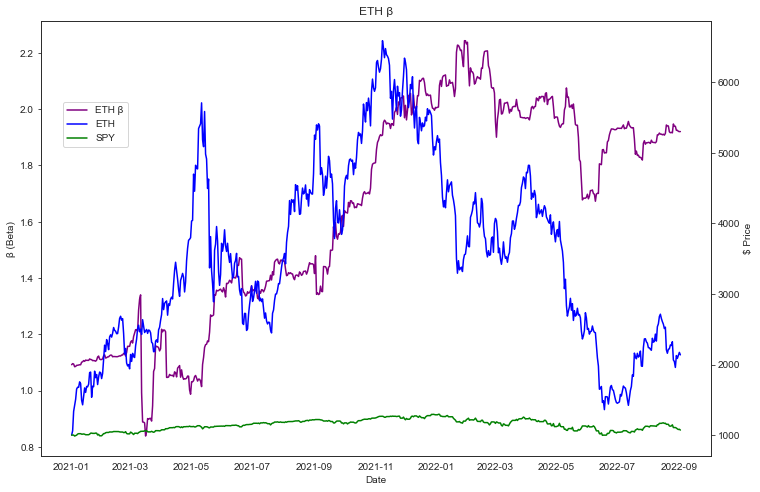

In [17]:
sns.set_style('white')
plt.rcParams["figure.figsize"] = [12, 8]
fig, ax1 = plt.subplots()
ax1.plot(beta_eth.loc["2021-01-01"::], color='Purple', label='Ether β')
ax2 = ax1.twinx()
ax2.plot(eth_prices['Close'].loc["2021-01-01"::]/eth_prices['Close'].loc["2021-01-01"::].iloc[0]*1000, color='Blue', label='ETH')
ax3 = plt.plot(spy_prices['Adj Close'].loc["2021-01-01"::]/spy_prices['Adj Close'].loc["2021-01-01"::].iloc[0]*1000, color='Green', label='SPY')
fig.legend(['ETH β', 'ETH', 'SPY'], loc='center left', bbox_to_anchor=(0.145, 0.7))
plt.title("ETH β")
ax1.set_xlabel('Date')
ax1.set_ylabel('β (Beta)')
ax2.set_ylabel('$ Price')

In [18]:
plt.style.use('default') #resetting to default params
sns.set_style('white')

In [19]:
#finding the Jensen Alpha of holding ETH versus SPY
PM.alpha_calc(eth_prices['Close'].loc['2021-01-01'::], spy_prices['Adj Close'])

Portfolio return: 0.5751368861939876
Benchmark return: 0.04189719585095264
Porfolio Beta: 1.937865634554352


0.49394575017023334

In [20]:
#finding the Jensen Alpha of holding BTC versus SPY
PM.alpha_calc(btc_prices['Close'].loc['2021-01-01'::], spy_prices['Adj Close'])

Portfolio return: -0.2071290971833113
Benchmark return: 0.04189719585095264
Porfolio Beta: 1.561971954066332


-0.2725713420565236

### Measuring a hypothetical token
Creating a portfolio based on a hypothetical token with a given return and variance and comparing LP positions of that token with a USD stable

<AxesSubplot:>

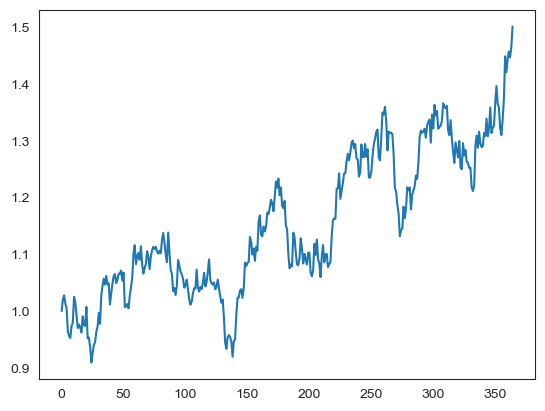

In [21]:
prices = pd.Series(PM.simple_forward_prices(1, 0.5, 0.02)) #create 365 days of prices for token with 50% return and 0.02 variance
prices.plot()

In [22]:
#create LP position of hypothetical token
stable_lp = PM.lp_stable_value(prices, 1000, 0.25)
stable_lp

,lp_value,lp_value_yield,full_hodl,diverse_hodl
0,1000.000000,1000.611539,1000.000000,1000.000000
1,1010.141830,1011.377690,1020.386517,1010.193258
2,1013.768005,1015.629019,1027.725568,1013.862784
3,1006.496937,1008.961246,1013.036085,1006.518043
4,1002.364214,1005.432890,1004.734018,1002.367009
...,...,...,...,...
360,1201.003296,1497.587425,1442.408918,1221.204459
361,1207.095747,1506.104868,1457.080143,1228.540071
362,1202.919168,1501.811565,1447.014524,1223.507262
363,1210.079316,1511.674696,1464.291950,1232.145975


In [23]:
#create portfolio with 50% LP comp from hypothetical token
portfolio = PM.token_lp_portfolio(prices, 0.5, 0.25)

In [25]:
#Sharpe ratios of token, LP position, and 50/50 portfolio
print(f"Token Sharpe Ratio: {PM.sharpe_portfolio(prices, 0.02)}")
print(f"LP Token/USD Sharpe Ratio: {PM.sharpe_portfolio(stable_lp['lp_value_yield'], 0.02)}")
print(f"50/50 Portfolio Sharpe Ratio: {PM.sharpe_portfolio(portfolio, 0.02)}")

Token Sharpe Ratio: 1.2483992871491945
LP Token/USD Sharpe Ratio: 2.649921485550759
50/50 Portfolio Sharpe Ratio: 1.7289015511377492


In [27]:
#Sortino ratios of token, LP position, and 50/50 portfolio
print(f"Token Sortino Ratio: {PM.sortino_portfolio(prices, 0.02)}")
print(f"LP Token/USD Sortino Ratio: {PM.sortino_portfolio(stable_lp['lp_value_yield'], 0.02)}")
print(f"50/50 Portfolio Sortino Ratio: {PM.sortino_portfolio(portfolio, 0.02)}")

Token Sortino Ratio: 1.6289918102430923
LP Token/USD Sortino Ratio: 2.953969414794634
50/50 Portfolio Sortino Ratio: 2.079562759092635
